In [104]:
import importlib
import os
import sys
import numpy as np

In [105]:
data = np.random.rand(100)
data2 = np.random.rand(1000)*2
data = [data, data, data2, data2]

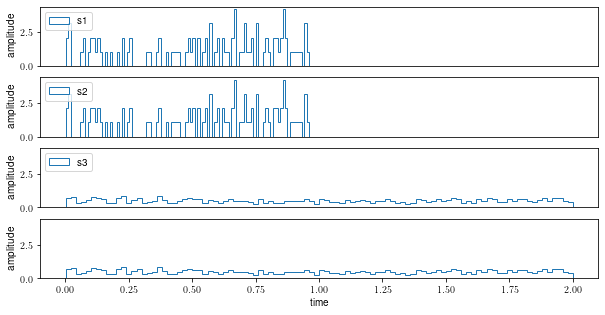

In [119]:
import plot_API
import plot_lib
importlib.reload(plot_API)
importlib.reload(plot_lib)

config = {"xlabel": "time",
          "ylabel": "amplitude",
          #"xlim": (0, 100),
          #"ylim": (0, 1),
          "sharey": True,
          "sharex": True,
          #"xticks": [10, 50, 80],
          #"xticklabels": ["101", "501", "801"],
          #"yticks": [0.2, 0.5, 1.0],
          #"yticklabels": ["0.2", "0.5", "1.0"],          
          "sub1": [{"legend": {"labels": ["s1"], "loc":2}},
                   {"legend": {"labels": ["s2"], "loc":2}},
                   {"legend": {"labels": ["s3"], "loc":2}}],
          "plot": {"alpha": 0.3}}

fig, axis = plot_API.plot_API(data, plot_lib.plot_hist, 'v', config)